- Load data
- Define X var , y-dep (target var)
-   check corr
    - important for linear / log reg func
- Time Series Analysis
    - tsa decompose time
- split train 80%, test 20%
    - don't cross val
- build models
- eval for best model
    - box plot, column bar 
- predict w/ best model
- plot actual vs predicted

import libraries

In [320]:
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import os

Open csv file. If not, use yfinance to get stock data

In [321]:
if os.path.exists('pldt.csv'):
    pldt = pd.read_csv('pldt.csv', index_col=0)
else:
    pldt = yf.Ticker('PHI')
    pldt = pldt.history(period='max')
    pldt.to_csv('pldt.csv')

set the index as the dates

In [322]:
pldt.index = pd.to_datetime(pldt.index)

In [323]:
pldt

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1973-05-03 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,9936,0.0,0.0
1973-05-04 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,22080,0.0,0.0
1973-05-07 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,3312,0.0,0.0
1973-05-08 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,7176,0.0,0.0
1973-05-09 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,1104,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-25 00:00:00-04:00,21.930000,21.969999,21.690001,21.889999,54100,0.0,0.0
2023-10-26 00:00:00-04:00,21.740000,22.000000,21.639999,21.940001,50400,0.0,0.0
2023-10-27 00:00:00-04:00,21.780001,21.780001,21.459999,21.610001,33600,0.0,0.0


<AxesSubplot: xlabel='Date'>

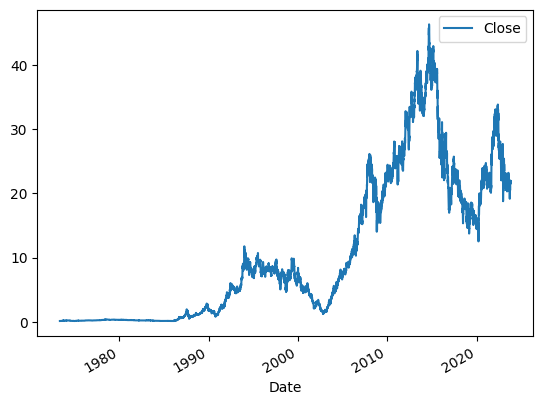

In [324]:
pldt.plot.line(y='Close', use_index = True)

the initial prediction will try to use only price action data first.

In [325]:
del pldt["Dividends"]
del pldt["Stock Splits"]

In [326]:
pldt

,Open,High,Low,Close,Volume
Date,,,,,
1973-05-03 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,9936
1973-05-04 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,22080
1973-05-07 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,3312
1973-05-08 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,7176
1973-05-09 00:00:00-04:00,0.090196,0.090196,0.090196,0.090196,1104
...,...,...,...,...,...
2023-10-25 00:00:00-04:00,21.930000,21.969999,21.690001,21.889999,54100
2023-10-26 00:00:00-04:00,21.740000,22.000000,21.639999,21.940001,50400
2023-10-27 00:00:00-04:00,21.780001,21.780001,21.459999,21.610001,33600


I choose to only use the data from 2000 onwards, since i want to make sure that the price action would still be relevant to us now.

In [327]:
# target var is next 'Close' Price

In [328]:
import pytz

start_date = pd.to_datetime("2000-01-01").tz_localize('UTC')
pldt = pldt[pldt.index >= start_date]


In [329]:
pldt

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03 00:00:00-05:00,7.974105,8.421252,7.880950,8.383989,277600
2000-01-04 00:00:00-05:00,8.346725,8.346725,8.085890,8.085890,271700
2000-01-05 00:00:00-05:00,7.638746,7.713270,7.489697,7.601483,238300
2000-01-06 00:00:00-05:00,7.415174,7.433806,7.322019,7.340650,61800
2000-01-07 00:00:00-05:00,7.377909,7.564220,7.359278,7.564220,133400
...,...,...,...,...,...
2023-10-25 00:00:00-04:00,21.930000,21.969999,21.690001,21.889999,54100
2023-10-26 00:00:00-04:00,21.740000,22.000000,21.639999,21.940001,50400
2023-10-27 00:00:00-04:00,21.780001,21.780001,21.459999,21.610001,33600


lets look at the correlations, for anything significant

In [330]:
pldt.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999814,0.999777,0.999649,-0.195968
High,0.999814,1.000000,0.999722,0.999818,-0.194055
Low,0.999777,0.999722,1.000000,0.999845,-0.198178
Close,0.999649,0.999818,0.999845,1.000000,-0.196327
Volume,-0.195968,-0.194055,-0.198178,-0.196327,1.000000


<AxesSubplot: >

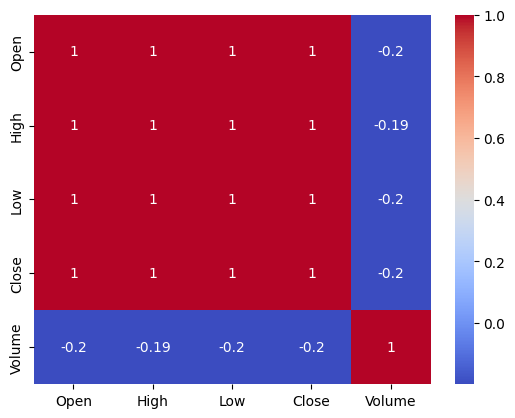

In [331]:
import matplotlib as plt
import seaborn as sns

sns.heatmap(pldt.corr(), annot=True, cmap='coolwarm')


this correlations need to be kept in mind when considering which algorithms to use

In [332]:
import numpy as np
import statsmodels.api as sm 

I want to see of there is anything interesting when we remove some of the noise from the price action

- There are 52 trading weeks in a year, and the data is 13 years long, hence, the period is set the the product of these

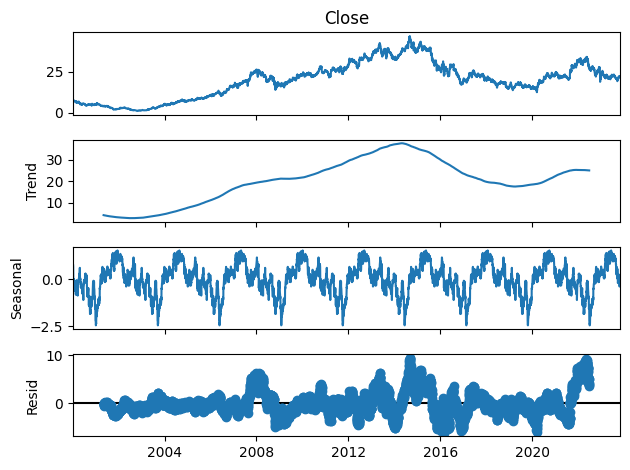

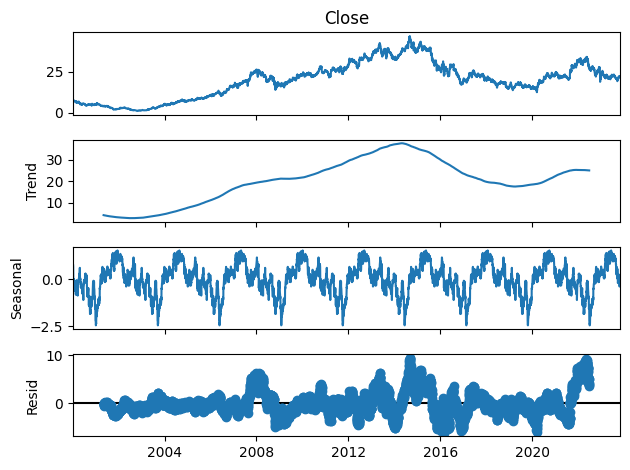

In [333]:
res = sm.tsa.seasonal_decompose(pldt['Close'],period=676) #13 years by 52 trading weeks


# Plot the decomposed components
res.plot()

<AxesSubplot: xlabel='Date'>

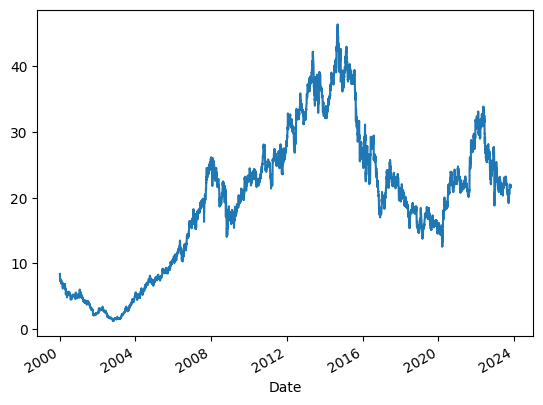

In [334]:
pldt['Close'].plot()

by shifting the close price back one day, we can create the "tomorrow" price which we will try to predict 

In [335]:
pldt['Close_Tomorrow'] = pldt['Close'].shift(-1).copy()


C:\Users\enzo\AppData\Local\Temp\ipykernel_10472\578260138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pldt['Close_Tomorrow'] = pldt['Close'].shift(-1).copy()


drop the last row, since it has a NaN as a result of shifting. Hence, there isn't a "tomorrow" close price yet for the last day of the dataset

In [336]:
pldt = pldt[:-1]
pldt

,Open,High,Low,Close,Volume,Close_Tomorrow
Date,,,,,,
2000-01-03 00:00:00-05:00,7.974105,8.421252,7.880950,8.383989,277600,8.085890
2000-01-04 00:00:00-05:00,8.346725,8.346725,8.085890,8.085890,271700,7.601483
2000-01-05 00:00:00-05:00,7.638746,7.713270,7.489697,7.601483,238300,7.340650
2000-01-06 00:00:00-05:00,7.415174,7.433806,7.322019,7.340650,61800,7.564220
2000-01-07 00:00:00-05:00,7.377909,7.564220,7.359278,7.564220,133400,7.657380
...,...,...,...,...,...,...
2023-10-24 00:00:00-04:00,21.590000,21.969999,21.570000,21.719999,91100,21.889999
2023-10-25 00:00:00-04:00,21.930000,21.969999,21.690001,21.889999,54100,21.940001
2023-10-26 00:00:00-04:00,21.740000,22.000000,21.639999,21.940001,50400,21.610001


split data. Ensure that the rows aren't shuffled, since the time is import aspect of stock data

In [337]:
from sklearn.model_selection import train_test_split

X = pldt[['Open', 'High', 'Low','Close', 'Volume']]
y = pldt['Close_Tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [338]:
X_train.count(), X_test.count()

(Open      4796
 High      4796
 Low       4796
 Close     4796
 Volume    4796
 dtype: int64,
 Open      1199
 High      1199
 Low       1199
 Close     1199
 Volume    1199
 dtype: int64)

In [339]:
y_train.count(), y_test.count()

(4796, 1199)

import algorithms, to see which would perform the best

In [340]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

MSE will be used to evaluate the performance and compare the models' performance against each other 

In [341]:
from sklearn.metrics import mean_squared_error

In [342]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# NN
models.append(('MLP', MLPRegressor()))

# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [343]:
names = []
train_results = []
test_results = []

for name, model in models:
    names.append(name)
    
    # Fit the model on the training data
    res = model.fit(X_train, y_train)
    
    # Training results
    train_result = mean_squared_error(res.predict(X_train), y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), y_test)
    test_results.append(test_result)

c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.595e+02, tolerance: 6.493e+01
  model = cd_fast.enet_coordinate_descent(


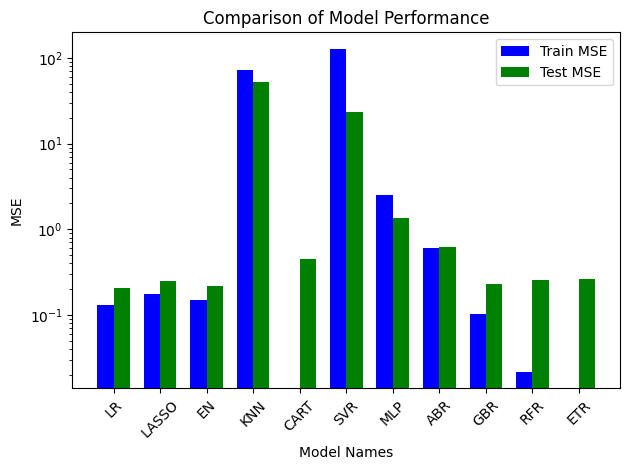

In [344]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(names))

bar_width = 0.35

fig, ax = plt.subplots()

# Create bars for training and testing side by side
bar1 = ax.bar(x - bar_width/2, train_results, bar_width, label='Train MSE', color='b')
bar2 = ax.bar(x + bar_width/2, test_results, bar_width, label='Test MSE', color='g')

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)

ax.legend()

plt.yscale('log')


ax.set_xlabel('Model Names')
ax.set_ylabel('MSE')
ax.set_title('Comparison of Model Performance')

plt.tight_layout()
plt.show()


the plot shows the difference in performance of the algorithms, however it would also be helpful to see exact figures

In [345]:
mse_results = pd.DataFrame({'Model Name': names, 'Train MSE': train_results, 'Test MSE': test_results})

mse_results.sort_values(by='Test MSE', ascending=True, inplace=True)
mse_results

,Model Name,Train MSE,Test MSE
0,LR,0.129672,0.206575
2,EN,0.149508,0.219121
8,GBR,0.103179,0.227171
1,LASSO,0.175825,0.245416
9,RFR,0.021447,0.252904
10,ETR,0.000000,0.259776
4,CART,0.000000,0.446854
7,ABR,0.605215,0.616386
6,MLP,2.538390,1.350010
5,SVR,128.959256,23.335748


Linear Regression and Elastic Net performed the best among the rest. Now, I see how well they perform

In [346]:
# Create and train the Linear Regression (LR) model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Create and train the Elastic Net (EN) model
en_model = ElasticNet()
en_model.fit(X_train, y_train)

ElasticNet()

In [347]:
# Generate predictions for the LR and EN models on the test data
lr_predictions = lr_model.predict(X_test)
en_predictions = en_model.predict(X_test)


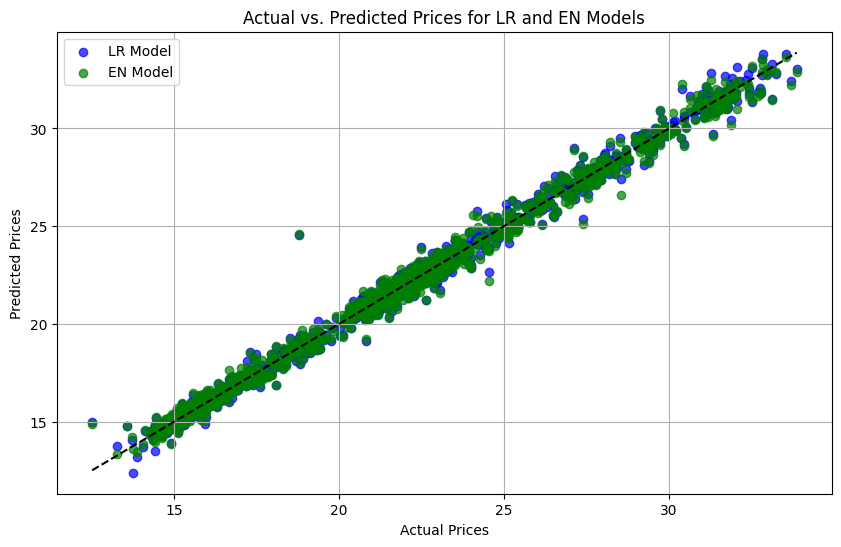

In [348]:


# Create a scatterplot for the LR model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, label='LR Model', color='b', alpha=0.7)

# Create a scatterplot for the EN model
plt.scatter(y_test, en_predictions, label='EN Model', color='g', alpha=0.7)

# Add a diagonal line for reference (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linestyle='--')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices for LR and EN Models')
plt.legend()
plt.grid(True)

plt.show()


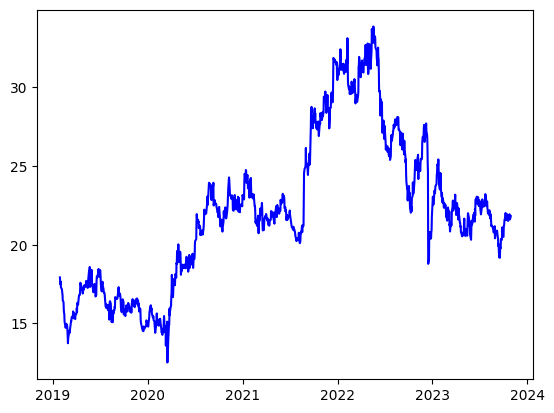

In [350]:
plt.plot(y_test, label='Actual Prices', color='b')

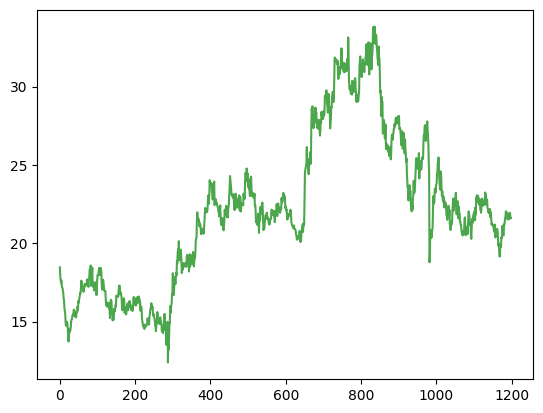

In [351]:
plt.plot(lr_predictions, label='LR Predictions', color='g', linestyle='-', alpha=0.7)

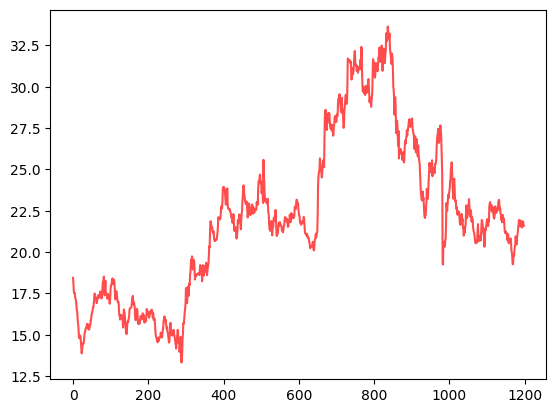

In [352]:
plt.plot(en_predictions, label='EN Predictions', color='r', linestyle='-', alpha=0.7)

LR and EN seem to be able to follow the actual price movement almost exactly

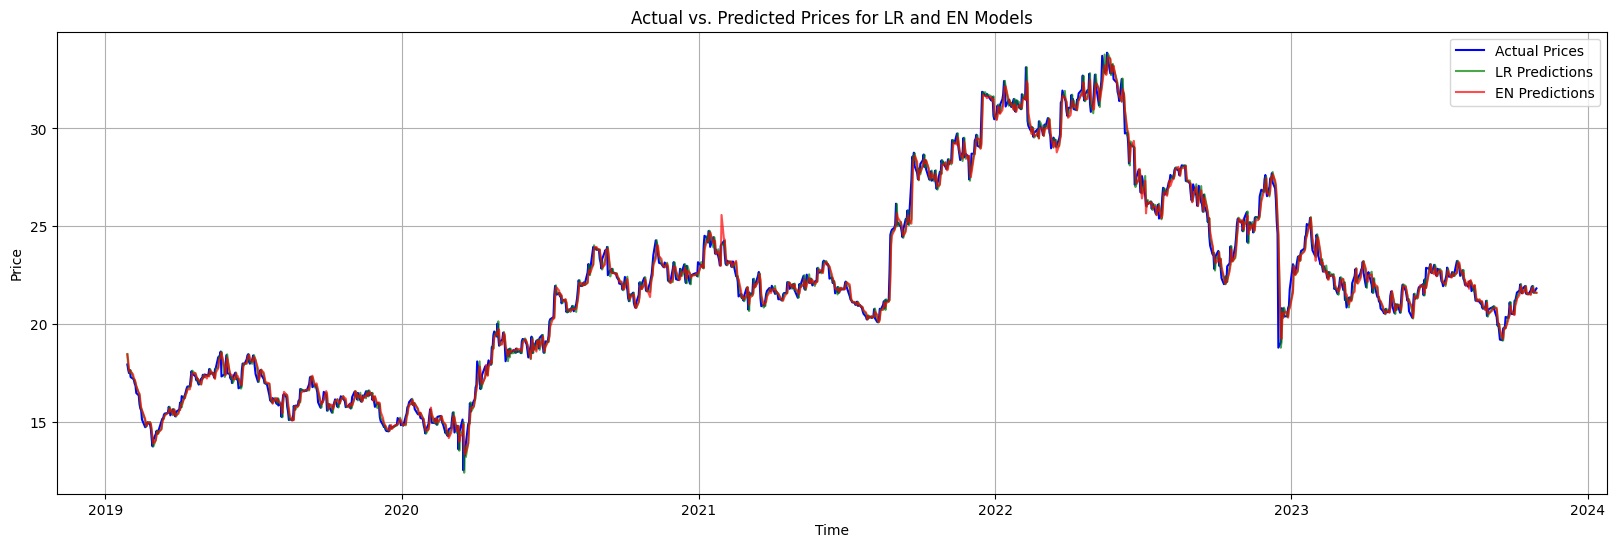

In [353]:
# Create DataFrames for LR and EN predictions with the same index as y_test
lr_predictions_df = pd.DataFrame(data=lr_predictions, index=y_test.index, columns=['LR Predictions'])
en_predictions_df = pd.DataFrame(data=en_predictions, index=y_test.index, columns=['EN Predictions'])

# Create a line graph for the actual prices
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Actual Prices', color='b')

# Create line graphs for LR and EN model predictions
plt.plot(lr_predictions_df, label='LR Predictions', color='g', linestyle='-', alpha=0.7)
plt.plot(en_predictions_df, label='EN Predictions', color='r', linestyle='-', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices for LR and EN Models')
plt.legend()
plt.grid(True)

plt.show()

Now, lets try to use LSTM neural net, since it suites the task of time series data forecasting

In [354]:
pldt

,Open,High,Low,Close,Volume,Close_Tomorrow
Date,,,,,,
2000-01-03 00:00:00-05:00,7.974105,8.421252,7.880950,8.383989,277600,8.085890
2000-01-04 00:00:00-05:00,8.346725,8.346725,8.085890,8.085890,271700,7.601483
2000-01-05 00:00:00-05:00,7.638746,7.713270,7.489697,7.601483,238300,7.340650
2000-01-06 00:00:00-05:00,7.415174,7.433806,7.322019,7.340650,61800,7.564220
2000-01-07 00:00:00-05:00,7.377909,7.564220,7.359278,7.564220,133400,7.657380
...,...,...,...,...,...,...
2023-10-24 00:00:00-04:00,21.590000,21.969999,21.570000,21.719999,91100,21.889999
2023-10-25 00:00:00-04:00,21.930000,21.969999,21.690001,21.889999,54100,21.940001
2023-10-26 00:00:00-04:00,21.740000,22.000000,21.639999,21.940001,50400,21.610001


In [355]:
pldt

,Open,High,Low,Close,Volume,Close_Tomorrow
Date,,,,,,
2000-01-03 00:00:00-05:00,7.974105,8.421252,7.880950,8.383989,277600,8.085890
2000-01-04 00:00:00-05:00,8.346725,8.346725,8.085890,8.085890,271700,7.601483
2000-01-05 00:00:00-05:00,7.638746,7.713270,7.489697,7.601483,238300,7.340650
2000-01-06 00:00:00-05:00,7.415174,7.433806,7.322019,7.340650,61800,7.564220
2000-01-07 00:00:00-05:00,7.377909,7.564220,7.359278,7.564220,133400,7.657380
...,...,...,...,...,...,...
2023-10-24 00:00:00-04:00,21.590000,21.969999,21.570000,21.719999,91100,21.889999
2023-10-25 00:00:00-04:00,21.930000,21.969999,21.690001,21.889999,54100,21.940001
2023-10-26 00:00:00-04:00,21.740000,22.000000,21.639999,21.940001,50400,21.610001


In [356]:
X = pldt[['Open', 'High', 'Low', 'Close', 'Volume']]
y = pldt['Close_Tomorrow']

In [357]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train1, X_test1 = X[0:train_size], X[train_size:len(X)]
Y_train1, Y_test1 = y[0:train_size], y[train_size:len(X)]

In [358]:
X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape

((4796, 5), (1199, 5), (4796,), (1199,))

In [359]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

First, Let's try without scaling the data, and see what happens

In [ ]:
# Define sequence length and number of features
seq_length = 5  
n_features = X_train1.shape[1]

# Create input sequences and corresponding target values
X_train_sequences = []
Y_train_sequences = []

# Create sequences for the training set
for i in range(len(X_train1) - seq_length):
    X_train_sequences.append(X_train1[i:i + seq_length])
    Y_train_sequences.append(Y_train1[i + seq_length])

# Convert sequences to numpy arrays
X_train_sequences = np.array(X_train_sequences)
Y_train_sequences = np.array(Y_train_sequences)

# Create the LSTM model using TensorFlow and Keras
model = keras.Sequential()
model.add(layers.LSTM(128, activation='relu', input_shape=(seq_length, n_features), return_sequences=True ))
model.add(layers.LSTM(64, activation='relu', return_sequences=True ))
model.add(layers.LSTM(64, activation='relu', return_sequences=False ))
model.add(layers.Dense(1))  


In [361]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [362]:
model.fit(X_train_sequences, Y_train_sequences, epochs=50, batch_size=32)


Epoch 1/50
150/150 [==============================] - 4s 7ms/step - loss: 926313.3750
Epoch 2/50
150/150 [==============================] - 1s 7ms/step - loss: 240661.4844
Epoch 3/50
150/150 [==============================] - 1s 7ms/step - loss: 23552.2871
Epoch 4/50
150/150 [==============================] - 1s 7ms/step - loss: 10228.2666
Epoch 5/50
150/150 [==============================] - 1s 7ms/step - loss: 13685.7334
Epoch 6/50
150/150 [==============================] - 1s 7ms/step - loss: 6648.8765
Epoch 7/50
150/150 [==============================] - 1s 7ms/step - loss: 2006.7318
Epoch 8/50
150/150 [==============================] - 1s 7ms/step - loss: 2862.3635
Epoch 9/50
150/150 [==============================] - 1s 7ms/step - loss: 730.4020
Epoch 10/50
150/150 [==============================] - 1s 7ms/step - loss: 1837.7700
Epoch 11/50
150/150 [==============================] - 1s 7ms/step - loss: 698.2103
Epoch 12/50
150/150 [==============================] - 1s 7ms/step - 

In [363]:
# Evaluate the model on the test set
X_test_sequences = []
Y_test_sequences = []

# Create sequences for the test set
for i in range(len(X_test1) - seq_length):
    X_test_sequences.append(X_test1[i:i + seq_length])
    Y_test_sequences.append(Y_test1[i + seq_length])

X_test_sequences = np.array(X_test_sequences)
Y_test_sequences = np.array(Y_test_sequences)

test_loss = model.evaluate(X_test_sequences, Y_test_sequences)

print(f"Test Loss: {test_loss}")

38/38 [==============================] - 0s 3ms/step - loss: 228.2902
Test Loss: 228.29022216796875


In [364]:

predictions = model.predict(X_test_sequences)

38/38 [==============================] - 0s 2ms/step


In [365]:
predictions

array([[12.829107 ],
       [13.15076  ],
       [ 7.0008297],
       ...,
       [ 8.015044 ],
       [ 8.090354 ],
       [ 7.6471577]], dtype=float32)

the first version of the model doesn't perform well when the data isn't scaled. Now we scale the data, and see how it fairs.

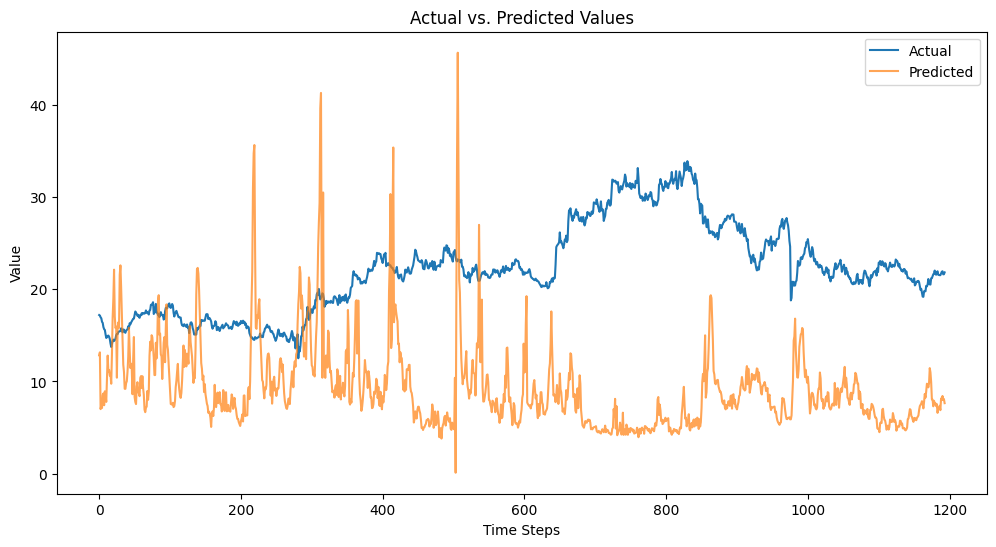

In [366]:


# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test_sequences, label="Actual")
plt.plot(predictions, label="Predicted", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.show()


In [367]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

In [368]:
X_train1_scaled.shape, X_test1_scaled.shape

((4796, 5), (1199, 5))

In [369]:
# Define sequence length and number of features
seq_length = 5  
n_features = X_train1_scaled.shape[1]

# Create input sequences and corresponding target values for training set
X_train_sequences = []
Y_train_sequences = []

# Create sequences for the training set
for i in range(len(X_train1_scaled) - seq_length):
    X_train_sequences.append(X_train1_scaled[i:i + seq_length])
    Y_train_sequences.append(Y_train1[i + seq_length])

# Convert sequences to numpy arrays
X_train_sequences = np.array(X_train_sequences)
Y_train_sequences = np.array(Y_train_sequences)

In [370]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(seq_length, n_features),return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=False))
model.add(Dense(1))  

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [371]:
# Train the model
model.fit(X_train_sequences, Y_train_sequences, epochs=50, batch_size=32)


Epoch 1/50
150/150 [==============================] - 3s 6ms/step - loss: 126.8189
Epoch 2/50
150/150 [==============================] - 1s 6ms/step - loss: 1.3368
Epoch 3/50
150/150 [==============================] - 1s 6ms/step - loss: 0.8526
Epoch 4/50
150/150 [==============================] - 1s 6ms/step - loss: 0.7883
Epoch 5/50
150/150 [==============================] - 1s 6ms/step - loss: 0.7696
Epoch 6/50
150/150 [==============================] - 1s 6ms/step - loss: 0.7797
Epoch 7/50
150/150 [==============================] - 1s 6ms/step - loss: 0.8184
Epoch 8/50
150/150 [==============================] - 1s 6ms/step - loss: 0.7837
Epoch 9/50
150/150 [==============================] - 1s 6ms/step - loss: 0.7531
Epoch 10/50
150/150 [==============================] - 1s 6ms/step - loss: 0.7549
Epoch 11/50
150/150 [==============================] - 1s 6ms/step - loss: 0.7791
Epoch 12/50
150/150 [==============================] - 1s 7ms/step - loss: 0.7460
Epoch 13/50
150/150 [==

In [372]:
# Create input sequences and corresponding target values for testing set
X_test_sequences = []
Y_test_sequences = []

# Create sequences for the test set
for i in range(len(X_test1_scaled) - seq_length):
    X_test_sequences.append(X_test1_scaled[i:i + seq_length])
    Y_test_sequences.append(Y_test1[i + seq_length])

X_test_sequences = np.array(X_test_sequences)
Y_test_sequences = np.array(Y_test_sequences)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_sequences, Y_test_sequences)

print(f"Test Loss: {test_loss}")

38/38 [==============================] - 0s 3ms/step - loss: 1.0268
Test Loss: 1.0268315076828003


In [373]:
predictions = model.predict(X_test_sequences)

38/38 [==============================] - 0s 3ms/step


In [374]:
predictions

array([[17.8463  ],
       [17.587801],
       [17.312435],
       ...,
       [21.138695],
       [21.186878],
       [21.23724 ]], dtype=float32)

This does way better than our first attempt

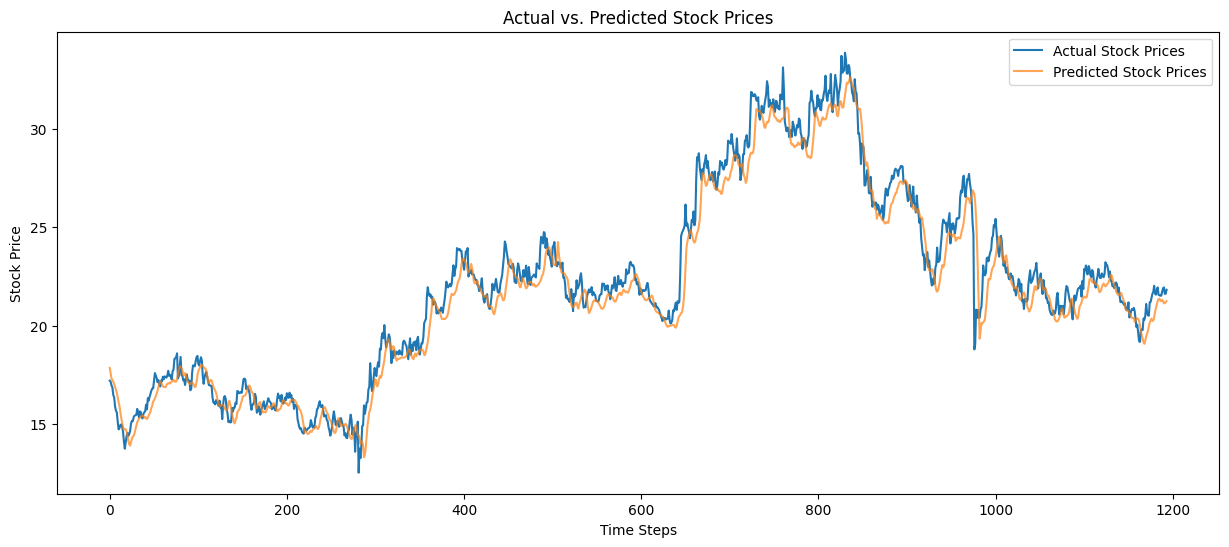

In [375]:


# Plot actual and predicted scaled values
plt.figure(figsize=(15, 6))
plt.plot(Y_test_sequences, label="Actual Stock Prices")
plt.plot(predictions, label="Predicted Stock Prices", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Actual vs. Predicted Stock Prices")
plt.show()

This model gets about 25% of the price wrong, which I think isn't bad at all given that we've used only few features

In [376]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_test_sequences, predictions)
mse = mean_squared_error(Y_test_sequences, predictions)
ape = np.abs((Y_test_sequences - predictions) / Y_test_sequences) * 100
mape = np.mean(ape)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Percentage Error (MAPE): 24.98%
Mean Absolute Error (MAE): 0.7302096125668217
Mean Squared Error (MSE): 1.026831562337323


In [377]:
ape_lstm = np.abs((Y_test_sequences - predictions) / Y_test_sequences) * 100
mape_lstm = np.mean(ape_lstm)
accuracy_lstm = 100 - mape_lstm
mse_lstm = mean_squared_error(Y_test_sequences, predictions)


# Append the LSTM model's metrics to the results
names.append('LSTM')
train_results.append(mse_lstm)  # Using MSE for consistency
test_results.append(mse_lstm)  # Using MSE for consistency



Interestingly, the LR and EN algorithms still perform better than the LSTM model

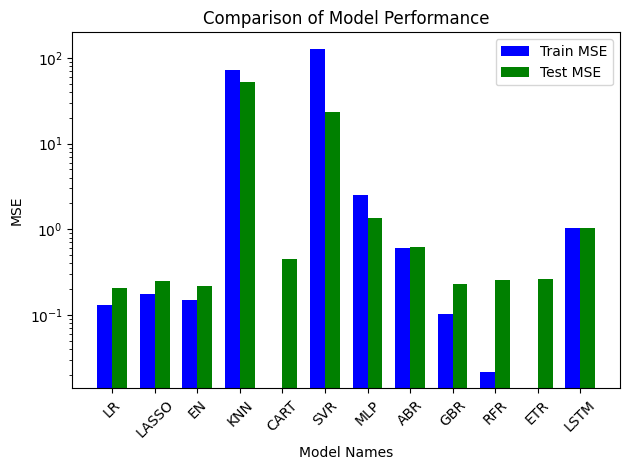

In [378]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(names))

bar_width = 0.35

fig, ax = plt.subplots()

# Create bars for training and testing side by side
bar1 = ax.bar(x - bar_width/2, train_results, bar_width, label='Train MSE', color='b')
bar2 = ax.bar(x + bar_width/2, test_results, bar_width, label='Test MSE', color='g')

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)

ax.legend()

plt.yscale('log')


ax.set_xlabel('Model Names')
ax.set_ylabel('MSE')
ax.set_title('Comparison of Model Performance')

plt.tight_layout()
plt.show()